### Enter Aircraft Code

In [107]:
aircraft_code = "N607UP"

In [108]:
from bs4 import BeautifulSoup
import requests

HEADERS = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36 Edg/111.0.1661.62'
    }
html_text = requests.get("https://flightaware.com/resources/registration/" + aircraft_code, headers=HEADERS).text

In [109]:
soup = BeautifulSoup(html_text, 'lxml')

In [110]:
info = soup.find('div', class_="pageContainer")
f = info.findAll('div', class_='attribute-row')

In [111]:
def remove_delimiters(word):
    h = []
    for i in word:
        if i != '\n' and i != '\t':
            h.append(i)
    return "".join(h)

In [112]:
d = {}
for i in f:
    d[i.find('div', class_='medium-1 columns title-text').text] = remove_delimiters(i.find('div', class_='medium-3 columns').text.replace('\n', ' '))

d

{'Summary': '2017 BOEING 747-8F Fixed wing multi engine (8 seats / 4 engines)',
 'Owner': 'C C & E I LLC LOUISVILLE , KY, US ',
 'Airworthiness Class': 'Standard/Transport',
 'Serial Number': '64265',
 'Engine': 'GE GENX-2B67/P (Turbo-fan)Thrust: 67400lbs',
 'Weight': 'Over 20,000lbs',
 'Speed': 'Not defined',
 'Mode S Code': '051761420 / A7E310',
 'Status': 'Assigned',
 'Certificate Issue Date': '2017-10-19',
 'Airworthiness Date': '2017-10-15',
 'Last Action Date': '2020-06-01',
 'Expiration': '2023-10-31',
 'Registry Source': 'FAA'}

### Further Information

In [113]:
ac2 = aircraft_code.upper()
req = requests.get("https://www.flightera.net/en/planes/"+ac2, headers=HEADERS)
html_text = req.content

In [114]:
if req.status_code < 300:
    soup2 = BeautifulSoup(html_text, 'lxml')
    info2 = soup2.find('div', class_='mx-auto flex max-w-7xl')
    f = info2.find('div', class_='max-w-7xl mx-auto px-4 sm:px-6 lg:px-8')
    g = f.find('h1',class_='text-xl font-bold leading-tight text-gray-900 dark:text-white').text

    print('Aircraft - ' + remove_delimiters(g))
else:
    print("Not Available")

Aircraft - N607UP: United Parcel Service (UPS) Boeing B747-800


In [115]:
import pandas as pd
if req.status_code < 300:
    tables = pd.read_html(html_text)
    df0 = tables[0]
    df0.rename(columns={0:"", 1:"Information"}, inplace=True)
    display(df0)
else:
    print("Not Available")

,,Information
0,AIRLINE,United Parcel Service (UPS) 5X/UPS
1,STATUS,Active
2,MODEL,B747-8F (B748)
3,ICAO IDENTIFIER,A7E310
4,SEAT CONFIGURATION,Cargo


In [116]:
if req.status_code < 300:
    i = info2.find('dl', class_='grid grid-cols-1 gap-x-4 gap-y-4 sm:grid-cols-2 lg:grid-cols-3')
    j = i.find('div', class_='mx-auto mb-4 sm:border-l')
    k = j.find_all('td', class_='text-gray-700 dark:text-gray-200 text-sm py-2 font-medium pr-2')
    l = j.find_all('td', class_='text-gray-900 dark:text-white py-2 text-sm')

    d = dict(zip(k, l))

    for k, v in d.items():
        print(f"{k.text.strip()}: {v.text.strip()}")
else:
    print("Not Available")

MANUFACTURER: Boeing
ENGINES: 4 x GEnx-2B67
FIRST FLIGHT: Oct 2017 (5 years ago)


### Past Flights (If any):

In [117]:
if len(tables) < 3:
    print("No past flights found")
else:
    df1 = tables[2].iloc[:,:-1]
    if 'TO' in df1.keys().tolist():
        i=0
        for item in df1['FROM']:
            l = []
            for le in item:
                l.append(le)
                if le == ')':
                    break
            df1['FROM'][i] = "".join(l)
            i+=1

        i=0
        for item in df1['TO']:
            l = []
            for le in item:
                l.append(le)
                if le == ')':
                    break
            df1['TO'][i] = "".join(l)
            i+=1
        display(df1)
    else:
        print("No past flights found")


,DATE,FLIGHT NUMBER,FROM,TO,DEPARTED,ARRIVED
0,11. Apr Live,5X76,Louisville 25min late Louisville (SDF / KSDF),Dubai 46min early Dubai (DXB / OMDB),04:50 25min late,01:33 * 46min early
1,07. Apr Landed,5X213,Louisville 19min late Louisville (SDF / KSDF),Cologne 23min early Cologne (CGN / EDDK),05:06 19min late,18:15 23min early
2,06. Apr Landed,5X99,Anchorage 11min late Anchorage (ANC / PANC),Louisville on time Louisville (SDF / KSDF),14:57 11min late,00:41 on time
3,06. Apr Landed,5X99,Seoul 29min late Seoul (ICN / RKSI),Anchorage 8min late Anchorage (ANC / PANC),22:19 29min late,12:44 8min late
4,05. Apr Landed,5X33,Sydney 1min late Sydney (SYD / YSSY),Seoul 1min early Seoul (ICN / RKSI),18:27 1min late,03:48 1min early


### Images, If available

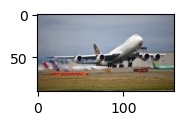

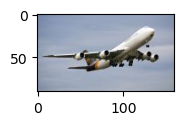

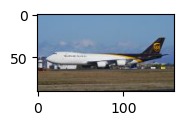

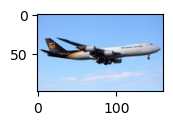

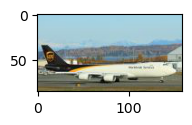

In [118]:
import urllib.request
from PIL import Image
import matplotlib.pyplot as plt
import cv2
image_tags = info.findAll('img')
links = []

for tag in image_tags:
    links.append(tag['src'])

for link in links:
    urllib.request.urlretrieve(
    link,"a.png")
    img = Image.open("a.png")
    plt.figure(figsize=(2,1))
    plt.imshow(img)


### Better Image Below

In [119]:
import json

js = requests.get("https://api.planespotters.net/pub/photos/reg/"+aircraft_code)
js.text
data = json.loads(js.text)


In [120]:
if len(data['photos']) > 0:
    data['photos'][0]['thumbnail_large']['src']

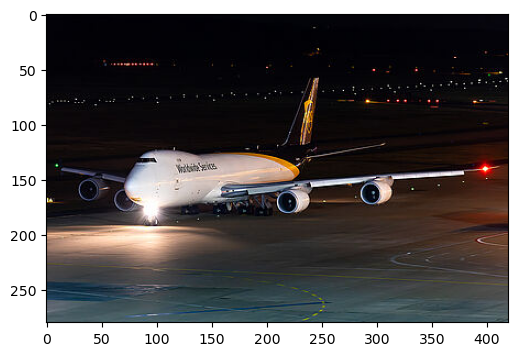

In [121]:
if len(data['photos']) > 0:
    urllib.request.urlretrieve(data['photos'][0]['thumbnail_large']['src'],"a.png")
    img = Image.open("a.png")
    plt.figure(figsize=(6,4))
    plt.imshow(img)
    plt.show()
else:
    print("Not Available")